<a href="https://colab.research.google.com/github/fardinpratama/Project-with-python/blob/master/Building_Recommender_System_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Simple Recommender Engine using Weighted Average</h2>
<p> Simple Recommender Engine menawarkan rekomendasi yang umum untuk semua user berdasarkan popularitas film dan terkadang genre.</p>

In [0]:
import pandas as pd

<h3>Data Preparation </h3>

In [0]:
movie_df = pd.read_csv('title.basics.tsv', sep='\t') 
rating_df = pd.read_csv('title.ratings.tsv', sep='\t')

In [0]:
movie_df.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,2014,\N,\N,Reality-TV,NaN
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,\N,\N,Reality-TV,NaN
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,\N,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,\N,\N,"Animation,Comedy,Drama",NaN
9024,tt9909210,tvEpisode,Politik und/oder Moral - Wie weit geht das Ver...,0,2005,\N,\N,\N,NaN


In [0]:
rating_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1608
1,tt0000002,6.0,197
2,tt0000003,6.5,1285
3,tt0000004,6.1,121
4,tt0000005,6.1,2050


In [0]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       9025 non-null   object
 6   endYear         9025 non-null   object
 7   runtimeMinutes  9025 non-null   object
 8   genres          9014 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB


In [0]:
movie_df.loc[(movie_df['primaryTitle'].isnull()) | (movie_df['originalTitle'].isnull())]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9000,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N
9001,tt10891902,tvEpisode,NaN,NaN,0,2020,\N,\N,Crime
9002,tt11737860,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9003,tt11737862,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9004,tt11737866,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9005,tt11737872,tvEpisode,NaN,NaN,0,2020,\N,\N,\N
9006,tt11737874,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9007,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography
9008,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music
9009,tt4404732,tvEpisode,NaN,NaN,0,2015,\N,\N,Comedy


- Data Cleaning

In [0]:
#mengambil data yang tidak null
movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]

In [0]:
len(movie_df)

9011

In [0]:
movie_df.loc[movie_df['genres'].isnull()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9014,tt10233364,tvEpisode,Rolling in the Deep Dish\tRolling in the Deep ...,0,2019,\N,\N,Reality-TV,NaN
9015,tt10925142,tvEpisode,The IMDb Show on Location: Star Wars Galaxy's ...,0,2019,\N,\N,Talk-Show,NaN
9016,tt10970874,tvEpisode,Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...,0,2019,\N,\N,\N,NaN
9017,tt11670006,tvEpisode,...ein angenehmer Unbequemer...\t...ein angene...,0,1981,\N,\N,Documentary,NaN
9018,tt11868642,tvEpisode,GGN Heavyweight Championship Lungs With Mike T...,0,2020,\N,\N,Talk-Show,NaN
9019,tt2347742,tvEpisode,No sufras por la alergia esta primavera\tNo su...,0,2004,\N,\N,\N,NaN
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,2014,\N,\N,Reality-TV,NaN
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,\N,\N,Reality-TV,NaN
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,\N,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,\N,\N,"Animation,Comedy,Drama",NaN


In [0]:
movie_df = movie_df.loc[movie_df['genres'].notnull()]

In [0]:
len(movie_df)

9000

In [0]:
import numpy as np
#mengubah nilai '\\N' pada startYear menjadi np.nan dan cast kolomnya menjadi float64
movie_df['startYear'] = movie_df['startYear'].replace("\\N", np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
print(movie_df['startYear'].unique()[:5])

#mengubah nilai '\\N' pada endYear menjadi np.nan dan cast kolomnya menjadi float64
movie_df['endYear'] = movie_df['endYear'].replace("\\N", np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
print(movie_df['endYear'].unique()[:5])

#mengubah nilai '\\N' pada runtimeMinutes menjadi np.nan dan cast kolomnya menjadi float64
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace("\\N", np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')
print(movie_df['runtimeMinutes'].unique()[:5])

[1898. 2018. 2016. 1987. 1973.]
[  nan 2005. 1955. 2006. 1999.]
[nan 29.  7. 23. 85.]


In [0]:
def transform_to_list(x):
    if ',' in x: 
    #ubah menjadi list apabila ada data pada kolom genre
        return x.split(',')
    else: 
    #jika tidak ada data, ubah menjadi list kosong
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

In [0]:
# untuk rating_df
rating_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1608
1,tt0000002,6.0,197
2,tt0000003,6.5,1285
3,tt0000004,6.1,121
4,tt0000005,6.1,2050


In [0]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030009 entries, 0 to 1030008
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1030009 non-null  object 
 1   averageRating  1030009 non-null  float64
 2   numVotes       1030009 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ MB


- Data Integration

In [0]:
#inner join
movie_rating_df = pd.merge(movie_df, rating_df, on="tconst", how="inner")

In [0]:
movie_rating_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0043745,short,Lion Down,Lion Down,0,1951.0,NaN,7.0,"[Animation, Comedy, Family]",7.1,459
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,NaN,85.0,[],5.7,7
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017.0,NaN,22.0,"[Adventure, Animation, Comedy]",8.5,240
3,tt6941700,tvEpisode,RuPaul Roast,RuPaul Roast,0,2017.0,NaN,NaN,[],8.0,11
4,tt7305674,video,UCLA Track & Field Promo,UCLA Track & Field Promo,0,2017.0,NaN,NaN,"[Short, Sport]",9.7,7


In [0]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 1375
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1376 non-null   object 
 1   titleType       1376 non-null   object 
 2   primaryTitle    1376 non-null   object 
 3   originalTitle   1376 non-null   object 
 4   isAdult         1376 non-null   int64  
 5   startYear       1376 non-null   float64
 6   endYear         26 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1376 non-null   object 
 9   averageRating   1376 non-null   float64
 10  numVotes        1376 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 129.0+ KB


In [0]:
#menghilangkan nilia null
movie_rating_df = movie_rating_df.dropna(subset = ['startYear','runtimeMinutes'])

In [0]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1374
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1004 non-null   object 
 1   titleType       1004 non-null   object 
 2   primaryTitle    1004 non-null   object 
 3   originalTitle   1004 non-null   object 
 4   isAdult         1004 non-null   int64  
 5   startYear       1004 non-null   float64
 6   endYear         17 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1004 non-null   object 
 9   averageRating   1004 non-null   float64
 10  numVotes        1004 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 94.1+ KB


<h3>Building Simple Recommender System</h3>

 Formula dari IMDB dengan Weighted Rating 

 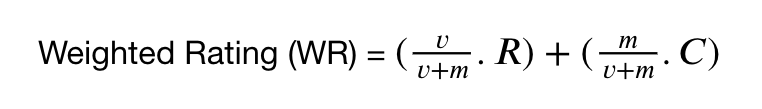

Ket : 
<dl>
    <dd>v: jumlah votes untuk film tersebut</dd>
    <dd>m: jumlah minimum votes yang dibutuhkan supaya dapat masuk dalam chart</dd>
    <dd>R: rata-rata rating dari film tersebut</dd>
    <dd>C: rata-rata jumlah votes dari seluruh semesta film</dd>
</dl>

In [0]:
#membuat fungsi weighted formula
def imdb_weighted_rating(df, var=0.8):
    v = df['numVotes']
    R = df['averageRating']
    C = df['averageRating'].mean()
    m = df['numVotes'].quantile(var)
    df['score'] = (v/(v+m)*R)+(m/(v+m)*C) #Rumus IMDb 
    return df['score']
    
imdb_weighted_rating(movie_rating_df)

#melakukan pengecekan dataframe
movie_rating_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
0,tt0043745,short,Lion Down,Lion Down,0,1951.0,NaN,7.0,"[Animation, Comedy, Family]",7.1,459,7.009992
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,NaN,85.0,[],5.7,7,6.796077
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017.0,NaN,22.0,"[Adventure, Animation, Comedy]",8.5,240,7.684380
5,tt2262289,movie,The Pin,The Pin,0,2013.0,NaN,85.0,[],7.7,27,6.921384
6,tt0874027,tvEpisode,Episode #32.9,Episode #32.9,0,2006.0,NaN,29.0,"[Comedy, Game-Show, News]",8.0,8,6.869089


- <h5>Membuat simple recommender system</h5>

In [0]:
def simple_recommender(df, top=100):
    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values('score',ascending = False) #urutkan dari nilai tertinggi ke terendah
    
    #Ambil data 100 teratas
    df = df[:top]
    return df
    
#Ambil data 25 teratas     
simple_recommender(movie_rating_df, top=25)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
68,tt4110822,tvEpisode,S.O.S. Part 2,S.O.S. Part 2,0,2015.0,NaN,43.0,"[Action, Adventure, Drama]",9.4,3820,9.254624
236,tt2200252,video,Attack of the Clones Review,Attack of the Clones Review,0,2010.0,NaN,86.0,[],9.3,1411,8.955045
1181,tt7697962,tvEpisode,Chapter Seventeen: The Missionaries,Chapter Seventeen: The Missionaries,0,2019.0,NaN,54.0,"[Drama, Fantasy, Horror]",9.2,1536,8.892450
326,tt7124590,tvEpisode,Chapter Thirty-Four: Judgment Night,Chapter Thirty-Four: Judgment Night,0,2018.0,NaN,42.0,"[Crime, Drama, Mystery]",9.1,1859,8.850993
1045,tt0533506,tvEpisode,The Prom,The Prom,0,1999.0,NaN,60.0,"[Action, Drama, Fantasy]",8.9,2740,8.740308
71,tt8399426,tvEpisode,Savages,Savages,0,2018.0,NaN,58.0,"[Drama, Fantasy, Romance]",9.0,1428,8.700045
1234,tt2843830,tvEpisode,VIII.,VIII.,0,2014.0,NaN,57.0,"[Adventure, Drama]",8.9,1753,8.660784
1087,tt4295140,tvSeries,Chef's Table,Chef's Table,0,2015.0,NaN,50.0,[],8.6,12056,8.566998
1054,tt2503932,tvEpisode,Trial and Error,Trial and Error,0,2013.0,NaN,43.0,"[Drama, Fantasy, Horror]",8.6,2495,8.451165
448,tt0337566,video,AC/DC: Live at Donington,AC/DC: Live at Donington,0,1992.0,NaN,120.0,"[Documentary, Music]",8.5,1343,8.256663


- <h5>Membuat simple recommender system dengan user preferences</h5>

In [0]:
df = movie_rating_df.copy()
def user_prefer_recommender(df, ask_adult, ask_start_year, ask_genre, top=100):
    #ask_adult = yes/no
    if ask_adult.lower() == 'yes':
        df = df.loc[df['isAdult'] == 1]
    elif ask_adult.lower() == 'no':
        df = df.loc[df['isAdult'] == 0]

    #ask_start_year = numeric
    df = df.loc[df['startYear'] >= int(ask_start_year)]

    #ask_genre = 'all' atau yang lain
    if ask_genre.lower() == 'all':
        df = df
    else:
        def filter_genre(x):
            if ask_genre.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['genres'].apply(lambda x: filter_genre(x))]

    df = df.loc[df['numVotes'] >= m] #Mengambil film dengan m yang lebih besar dibanding numVotes
    df = df.sort_values(by='score', ascending=False)
    
    #jika kamu hanya ingin mengambil 100 teratas
    df = df[:top]
    return df

user_prefer_recommender(df,
                       ask_adult = 'no',
                        ask_start_year = 2010,
                       ask_genre = 'fantasy'
                       )

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
1181,tt7697962,tvEpisode,Chapter Seventeen: The Missionaries,Chapter Seventeen: The Missionaries,0,2019.0,NaN,54.0,"[Drama, Fantasy, Horror]",9.2,1536,8.892450
71,tt8399426,tvEpisode,Savages,Savages,0,2018.0,NaN,58.0,"[Drama, Fantasy, Romance]",9.0,1428,8.700045
1054,tt2503932,tvEpisode,Trial and Error,Trial and Error,0,2013.0,NaN,43.0,"[Drama, Fantasy, Horror]",8.6,2495,8.451165
977,tt4391820,tvEpisode,Aisling,Aisling,0,2019.0,NaN,51.0,"[Crime, Drama, Fantasy]",7.5,1558,7.414087
298,tt9597142,tvEpisode,Skincrawlers/By the Silver Water of Lake Champ...,Skincrawlers/By the Silver Water of Lake Champ...,0,2019.0,NaN,44.0,"[Fantasy, Horror]",7.1,294,6.981595
585,tt5051278,tvMovie,A Midsummer Night's Dream,A Midsummer Night's Dream,0,2016.0,NaN,90.0,"[Comedy, Fantasy, Romance]",6.3,599,6.446466
677,tt8923408,tvEpisode,#JinnHunter,#JinnHunter,0,2019.0,NaN,24.0,"[Drama, Fantasy, Horror]",3.6,592,4.500821
